In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor, plot_importance

Loading the Train Data

In [2]:
# Load train data - set display count, head, coloums and shape
train_data_f = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',index_col = 'Id')
# print(train_data)
pd.set_option('display.max_rows', 100)
#  Display only top 5 rows - All columns included
print(train_data_f.head())
#  Displays all column names
print(train_data_f.columns)
#  print all count of rows and columns
print(train_data_f.shape)
train_data = train_data_f

# train_data = train_data.dropna(axis=0, subset=['SalePrice'])
# train_data = train_data_f.drop(['SalePrice'], axis=1)
train_sale_price = train_data_f.SalePrice

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

Load the Test Data

In [3]:
# Load train test data - set display count, head, coloums and shape
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
#  Display only top 5 rows - All columns included
print(test_data.head())
#  Displays all column names
print(test_data.columns)
#  print all count of rows and columns
print(test_data.shape)



      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1461         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1462         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
1463         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1464         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1465    

In [4]:
# check whether null values exists
train_data.isnull()
train_data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [5]:
# total null values for train data
total_null_values_train_data = train_data.isnull().sum()
total_null_values_train = pd.DataFrame(total_null_values_train_data)
print(total_null_values_train.sum())

0    6965
dtype: int64


In [6]:
#  test data
test_data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [7]:
# total null values for test data
total_null_values_test_data = test_data.isnull().sum()
total_null_values_test = pd.DataFrame(total_null_values_test_data)
print(total_null_values_test.sum())

0    7000
dtype: int64


Text(0.5, 1.0, 'sale prices based on year sold')

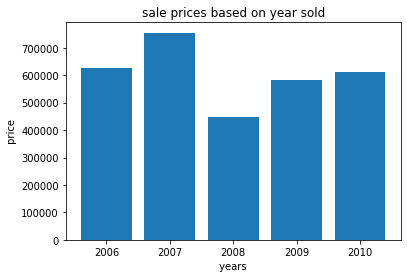

In [8]:
plt.bar(train_data['YrSold'], train_data_f['SalePrice'])
plt.xlabel(' years ')
plt.ylabel(' price ')
plt.title('sale prices based on year sold')

Text(0.5, 1.0, 'sale prices based on sale type')

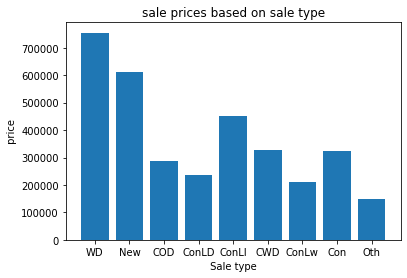

In [9]:
# # plt.plot(train_data['SaleType'], train_data['SalePrice'])
plt.bar(train_data['SaleType'], train_data_f['SalePrice'])
plt.xlabel(' Sale type ')
plt.ylabel(' price ')
plt.title('sale prices based on sale type')

Text(0.5, 1.0, 'sale prices based on year built type')

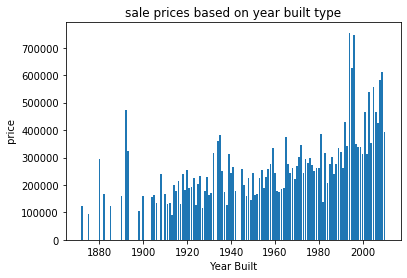

In [10]:
plt.bar(train_data['YearBuilt'], train_data_f['SalePrice'])
plt.xlabel(' Year Built ')
plt.ylabel(' price ')
plt.title('sale prices based on year built type')

Text(0.5, 1.0, 'sale prices based on SaleCondition')

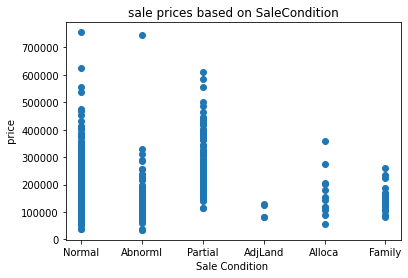

In [11]:
plt.scatter(train_data['SaleCondition'], train_data_f['SalePrice'])
plt.xlabel('Sale Condition ')
plt.ylabel(' price ')
plt.title('sale prices based on SaleCondition')

In [12]:
# train_data_f.head(1)
total_data = pd.concat((train_data_f, test_data))
# total_data.shape

In [13]:
# total_value = total_data.isna().sum().sort_values(ascending=False)
# total_value[total_value > 0]

In [14]:
# count of available data types
total_data.dtypes.value_counts()

object     43
int64      25
float64    12
dtype: int64

In [15]:
# Retruns dataframe of statistical data - count, mean, min, max, std
# total_data['SalePrice'].describe()

Heat map to see the corelation between the attributes 

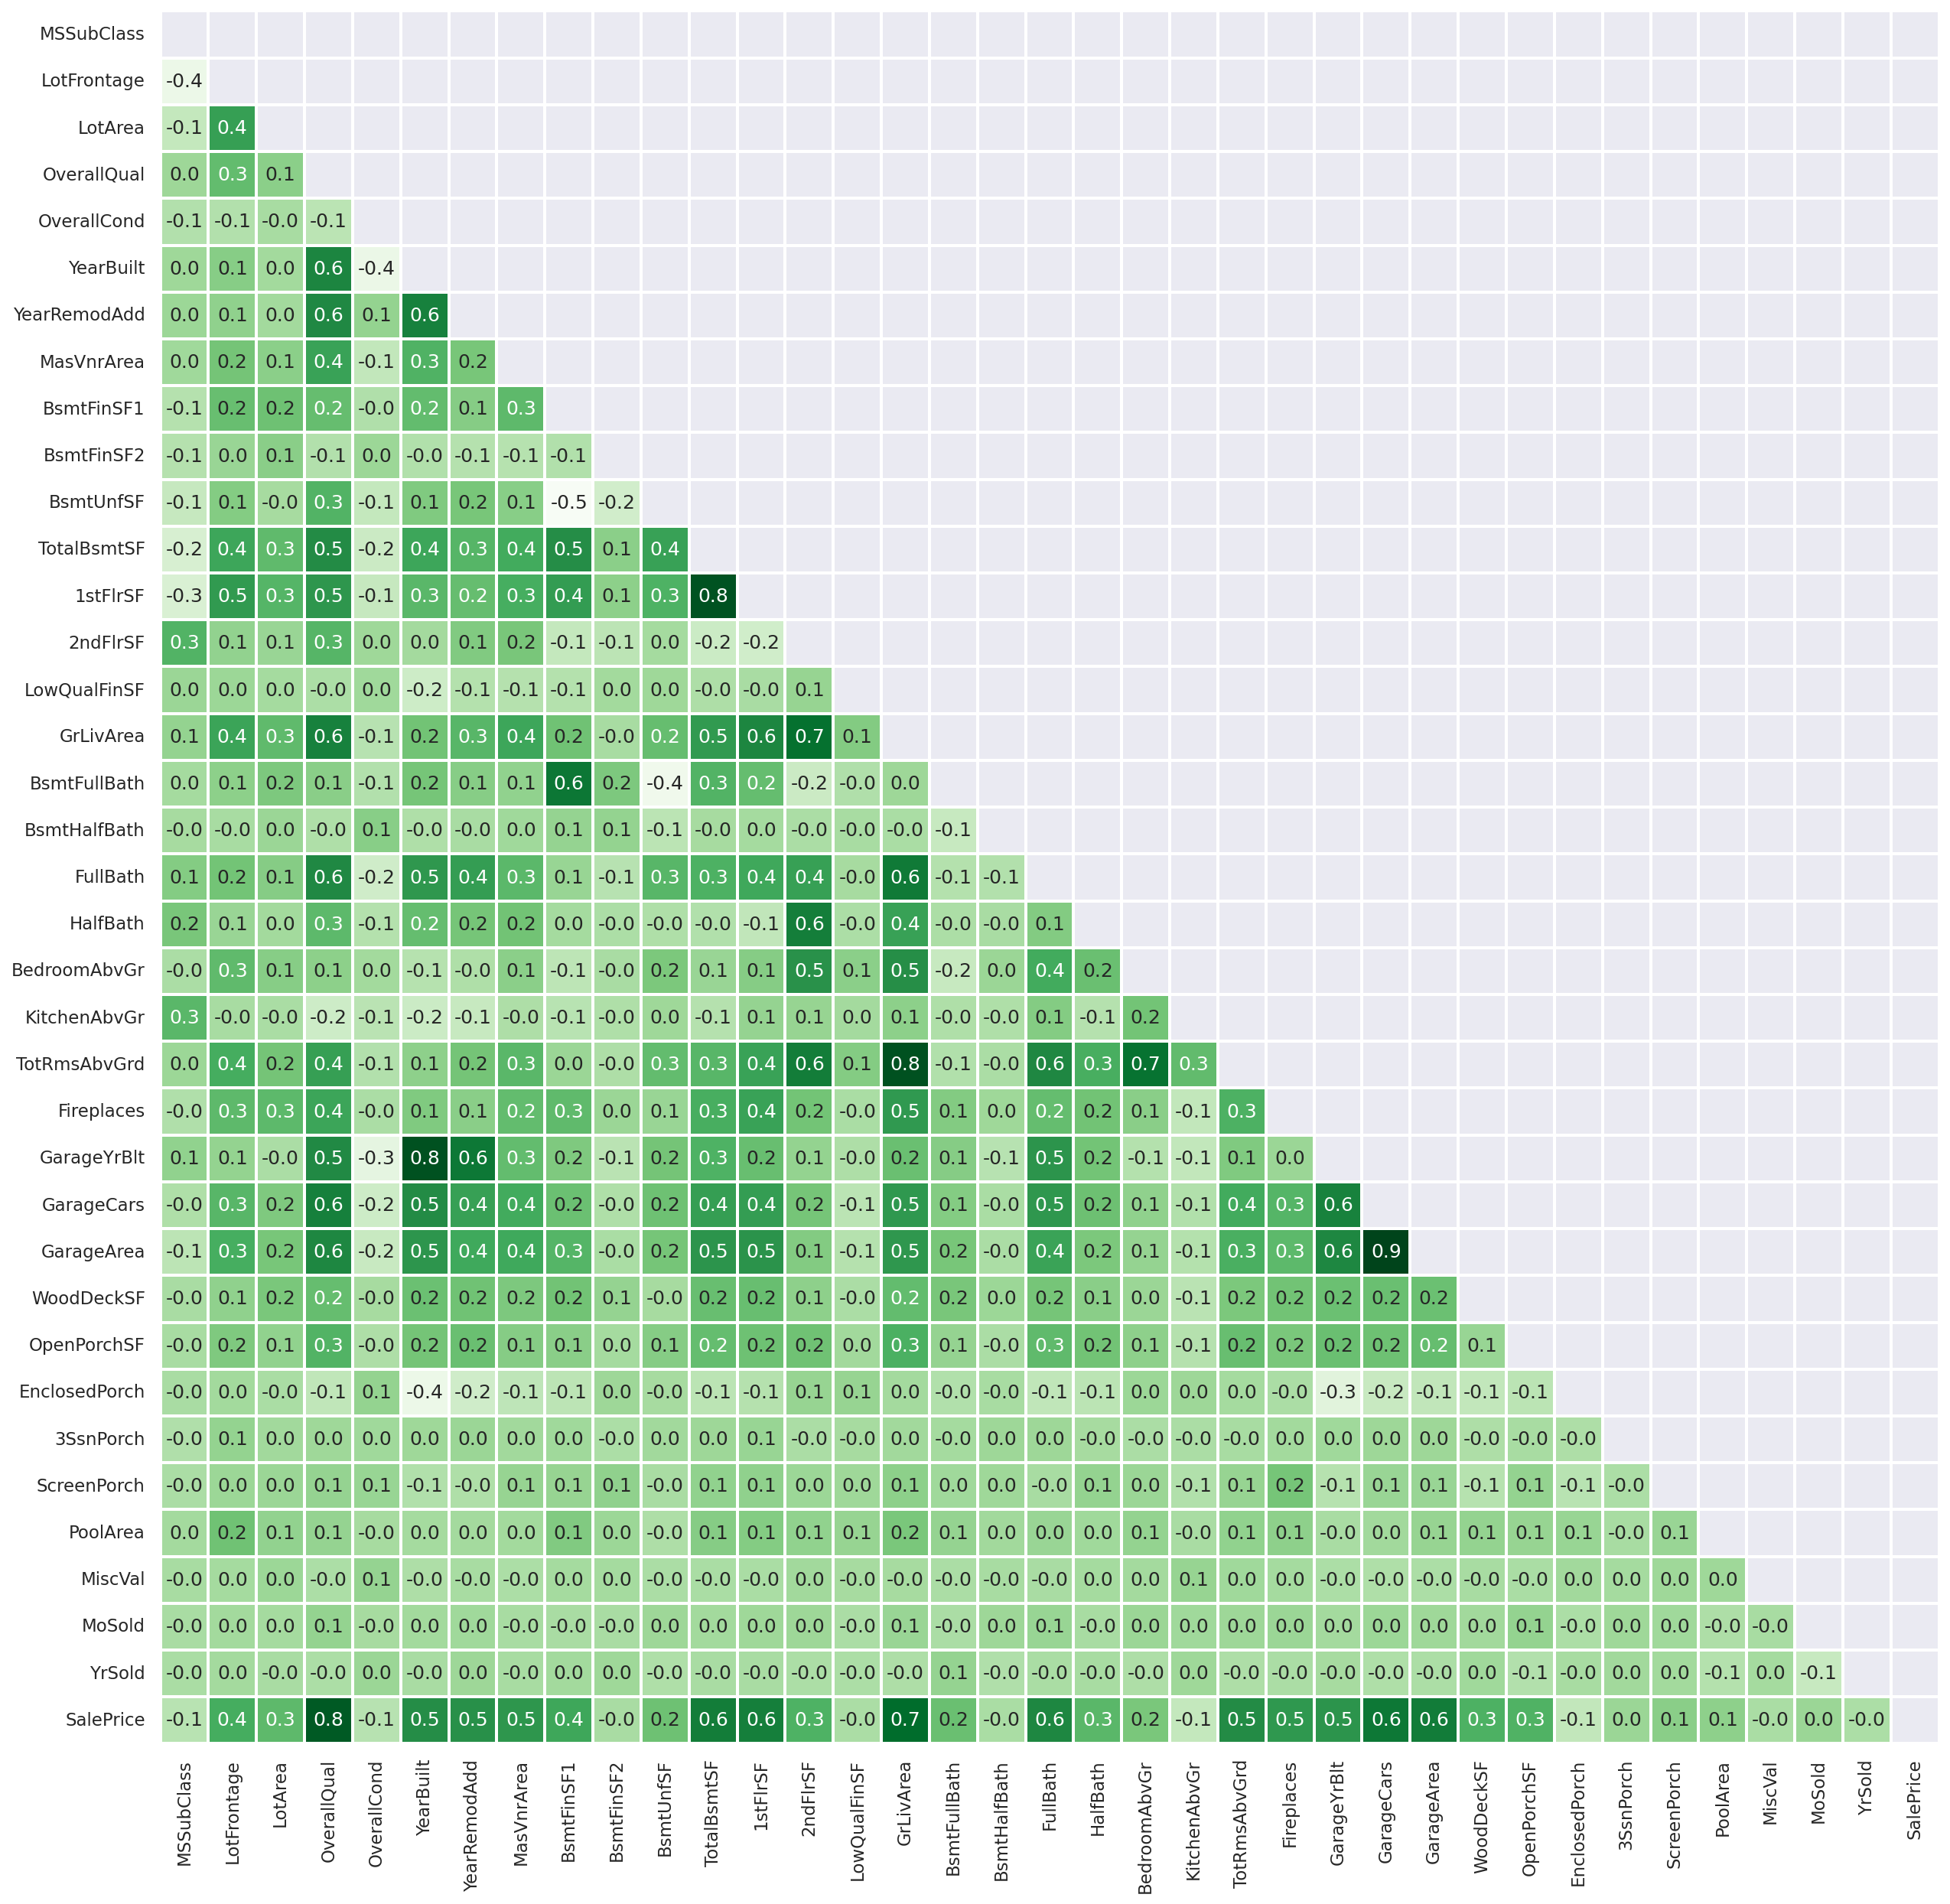

In [16]:
#  Generate relation between the existing features
# correlation -  summarize a large dataset and to identify and visualize patterns in the given data
correlation_matrix = train_data.corr()
#  masking the data - create a copy of data, np triu - returns upper triangle with default or 0 values
mask = np.triu(correlation_matrix.corr())
sns.set(font_scale=1.0)
plt.figure(figsize=(20, 20), dpi=150)
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='Greens', 
            square=False, mask=mask, linewidths=1, cbar=False)
plt.show()

# Data Cleaning

Find and remove null values

In [17]:
# Identify and store the data coloumns with null values > 1 & > half values
train_data_with_null_values = [col for col in train_data.columns if train_data[col].isnull().sum()>1]
print('columns with empty data in train data set', train_data_with_null_values)
print('')
print('')
train_data_with_half_null_values = [col for col in train_data.columns if train_data[col].isnull().sum()>(len(train_data)/2)]
print('columns with more null values in train data set', train_data_with_half_null_values)
print('')
print('')
test_data_with_null_values = [col for col in test_data.columns if test_data[col].isnull().sum()>1]
print('columns with empty data in test data set', test_data_with_null_values)
print('')
print('')
test_data_with_half_null_values = [col for col in test_data.columns if test_data[col].isnull().sum()>(len(test_data)/2)]
print('columns with more null values in train data set', test_data_with_half_null_values)

columns with empty data in train data set ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


columns with more null values in train data set ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


columns with empty data in test data set ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


columns with more null values in train data set ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [18]:
#  Dropping the columns with more than half null values
train_data.drop(train_data_with_half_null_values, axis=1,inplace=True)
test_data.drop(test_data_with_half_null_values, axis=1,inplace=True)

In [19]:
# check total existing data type and null values count
info = pd.DataFrame(total_data.dtypes, columns=['Dtype'])
info['Unique'] = total_data.nunique().values
info['Null'] = total_data.isnull().sum().values
info


,Dtype,Unique,Null
MSSubClass,int64,16,0
MSZoning,object,5,4
LotFrontage,float64,128,486
LotArea,int64,1951,0
Street,object,2,0
Alley,object,2,2721
LotShape,object,4,0
LandContour,object,4,0
Utilities,object,2,2
LotConfig,object,5,0


Categorical data

In [20]:
# count of available data types - after dropping the null values
train_data.dtypes.value_counts()

object     39
int64      34
float64     3
dtype: int64

In [21]:
# Identify the available categories of data - train data
object_cols = train_data.select_dtypes('object').columns
# print(object_cols)
# print(train_data['LotShape'].value_counts())
for col in object_cols:
    print('')
    print(train_data[col].value_counts())


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Norm      1260
Feedr       81
Ar

In [22]:
object_cols_test = test_data.select_dtypes('object').columns
for col in object_cols_test:
    print('')
    print(test_data[col].value_counts())


RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

Pave    1453
Grvl       6
Name: Street, dtype: int64

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64

AllPub    1457
Name: Utilities, dtype: int64

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

Norm      1251
Feedr       83
Artery      44
RR

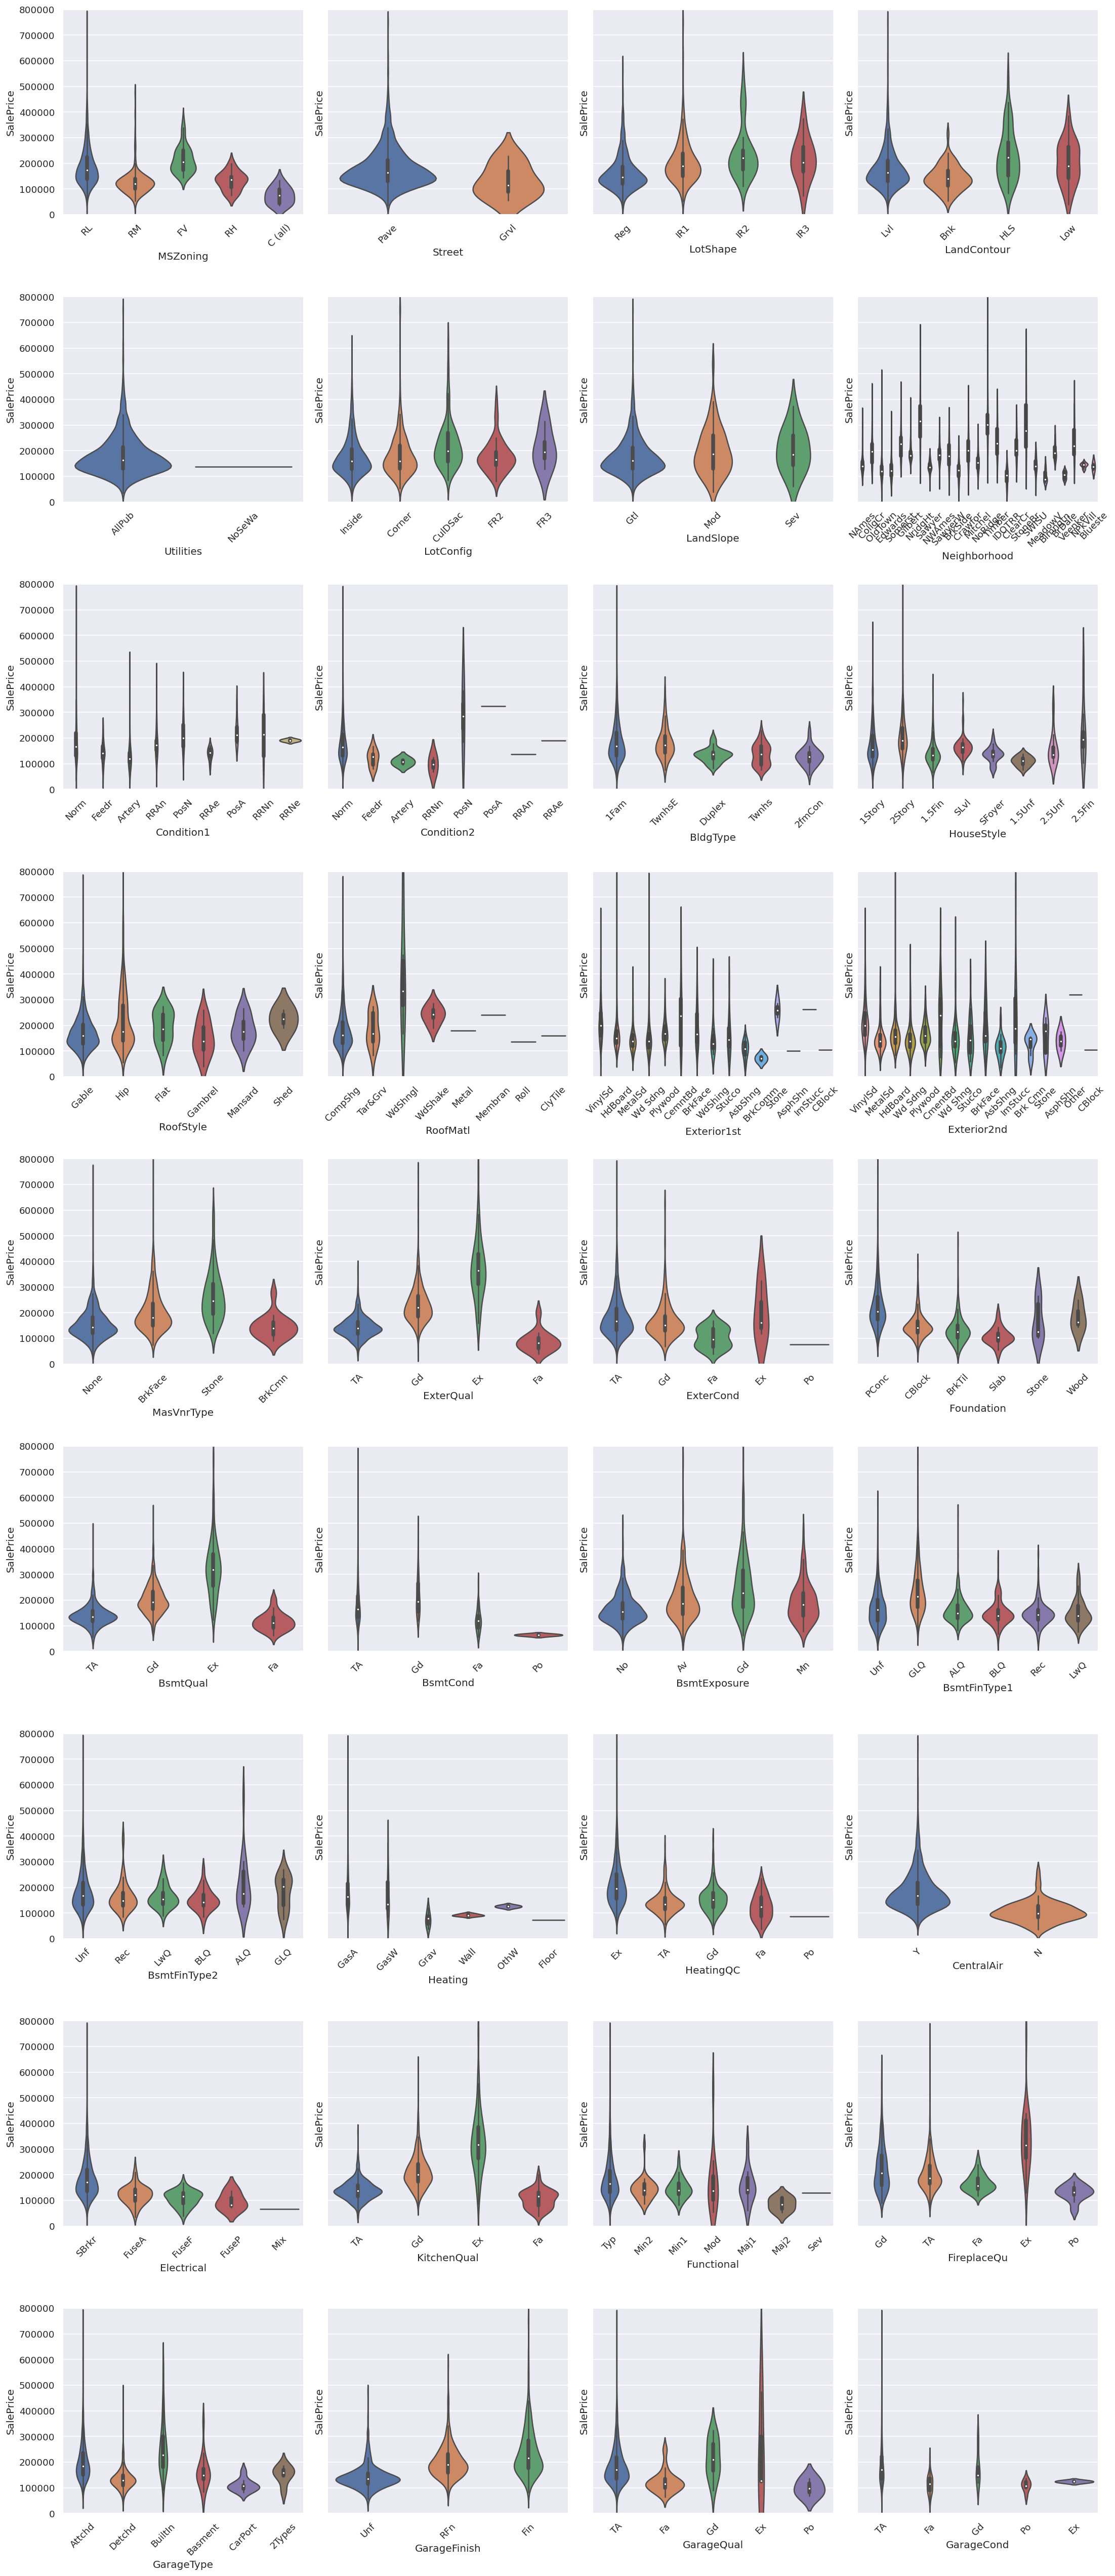

In [23]:
object_cols = train_data.select_dtypes('object').columns
fig, ax = plt.subplots(nrows=int(len(object_cols) / 4), ncols=4, figsize=(22, 1.4*len(object_cols)), sharey=True, dpi=120)

for col, subplot in zip(object_cols, ax.flatten()):
    freq = train_data[col].value_counts()
    subplot.ticklabel_format(style='plain')
    plt.ylim([0, 800000])
    plt.subplots_adjust(wspace=.1,hspace=.4)
    for tick in subplot.get_xticklabels():
        tick.set_rotation(45)
    sns.violinplot(data=train_data, x=col, y=total_data['SalePrice'], order=freq.index, ax=subplot)

In [24]:
# dropping the utitlites based on the data - only one value for both train and test data - its not a dependent feature
train_data.drop('Utilities',axis=1,inplace=True)
test_data.drop('Utilities',axis=1,inplace=True)

In [25]:
print(type(total_data), total_data.shape)
total_data = pd.concat([train_data, test_data])
print(total_data.columns)

<class 'pandas.core.frame.DataFrame'> (2919, 80)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond

Adding new features using age (year attributes like substract)

In [26]:
# data frame to hold generated data
temp_gen_data = pd.DataFrame()
# Age of House when sold
temp_gen_data['Age'] = total_data['YrSold']-total_data['YearBuilt']
# Years between Remodeling and sales
temp_gen_data['AgeRemodel'] = total_data['YrSold']-total_data['YearRemodAdd']
year_cols = ['YrSold','YearBuilt','AgeRemodel', 'Age']
gen_data = pd.concat([total_data, temp_gen_data], axis=1).loc[:,year_cols]
X_1 = gen_data.loc[train_data.index, :]
X_1.head(5)

,YrSold,YearBuilt,AgeRemodel,Age
Id,,,,
1,2008,2003,5,5
2,2007,1976,31,31
3,2008,2001,6,7
4,2006,1915,36,91
5,2008,2000,8,8


plotting graphs sale price vs years(sold, build,age, remodel)

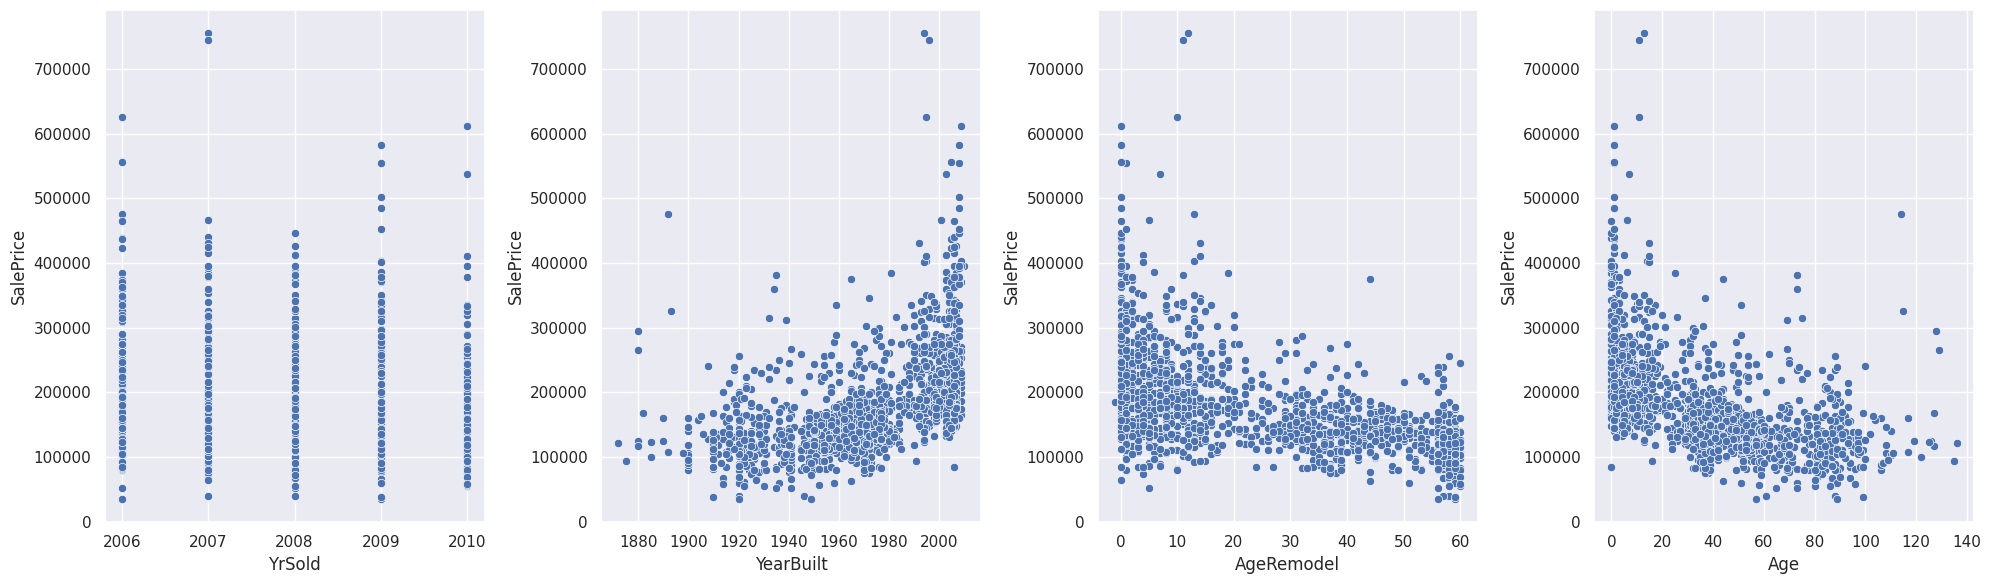

In [27]:
# plot graphs based on sale price and years
fig, ax = plt.subplots(1, 4, figsize=(20, 6), dpi=100)

# scatterplot for sale price vs years 
for col,i in zip(year_cols, [0,1,2,3]):
    sns.scatterplot(x=X_1.loc[:,col], y=train_data_f['SalePrice'], ax=ax[i])
fig.tight_layout()
plt.show()

Here for some values both built and remodel are same - based on it we convert into booleans

In [28]:
data_f = pd.DataFrame()
# check other values - remodel , garage, fireplace, bsmt, masonry all these columns has missing values - now we replaces with 0 & 1
data_f['Remodel'] = total_data['YearRemodAdd']!=total_data['YearBuilt']
data_f['Garage'] = total_data['GarageQual'].notnull()
data_f['Fireplace'] = total_data['FireplaceQu'].notnull()
data_f['Bsmt'] = total_data['BsmtQual'].notnull()
data_f['Masonry'] = total_data['MasVnrType'].notnull()
# Converting boolean columns [False,True] into numerical columns [0,1]
data_f = data_f.replace([False,True], [0,1])
data_f.head(5)

,Remodel,Garage,Fireplace,Bsmt,Masonry
Id,,,,,
1,0,1,0,1,1
2,0,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
5,0,1,1,1,1


new feature using count

In [29]:
# new data frame to store count
data_f1 = pd.DataFrame() 

data_f1["PorchTypes"] = train_data[[
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch"]].gt(0.0).sum(axis=1)

data_f1.head(5)

,PorchTypes
Id,
1,1
2,1
3,1
4,2
5,2


Above we have the data in single column with several label - after categorised

In [30]:
# Get total columns information
object_cols = total_data.select_dtypes(include=['object']).columns
# count of object types available - categorized data into unique categories in them
total_data[object_cols].nunique().sort_values().head(5)

Street          2
CentralAir      2
GarageFinish    3
LandSlope       3
PavedDrive      3
dtype: int64

Now we understand a set of unique strings holds all the rows - so we update these with respective numeric digits

In [31]:
# 'NA' as 0 'Po' as 1 'Fa' as 2 'TA' as 3  like this for other columns of categorial data
cal_col1 = [i for i in object_cols if ('QC' in i) or ('Qu' in i) or ('Cond' in i) and ('Condition' not in i)]
total_data.loc[:,cal_col1] = total_data.loc[:,cal_col1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])

# values related to 'BsmtFinType1', 'BsmtFinType2'
cal_col2 = ['BsmtFinType1', 'BsmtFinType2']
total_data.loc[:,cal_col2] = total_data.loc[:,cal_col2].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])

# values related to BsmtExposure
cal_col3 = ['BsmtExposure']
total_data.loc[:,cal_col3] = total_data.loc[:,cal_col3].fillna('NA')
total_data.loc[:,cal_col3] = total_data.loc[:,cal_col3].replace(['NA', 'No', 'Mn', 'Av', 'Gd'], list(range(5)))

# values related to LotShape
cal_col4 = ['LotShape']
total_data.loc[:,cal_col4] = total_data.loc[:,cal_col4].replace(['Reg', 'IR1', 'IR2', 'IR3'], list(range(4)))

# values related to GarageFinish
cal_col5 = ['GarageFinish']
total_data.loc[:,cal_col5] = total_data.loc[:,cal_col5].replace(['NA', 'Unf', 'RFn', 'Fin'], list(range(4)))

# values related to Functional
cal_col6 = ['Functional']
total_data.loc[:,cal_col3] = total_data.loc[:,cal_col3].fillna('Mod')
total_data.loc[:,cal_col6] = total_data.loc[:,cal_col6].replace(["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], list(range(8)))

In [32]:
o_columns = cal_col1+cal_col2+cal_col3+cal_col4+cal_col5+cal_col6
total_data.loc[:,o_columns].dtypes.value_counts()

float64    10
int64       5
dtype: int64

Adding median data - for same group data

In [33]:
data_f2 = pd.DataFrame()
data_f2["MedianNeighArea"] = total_data.groupby("Neighborhood")["GrLivArea"].transform("median")
# 1 and 3 - same group so same median data
data_f2.head(5)

,MedianNeighArea
Id,
1,1504.0
2,1706.5
3,1504.0
4,1648.0
5,2418.0


new features using mathematical transformation like - mean

In [34]:
data_f3 = pd.DataFrame()
data_f3["Liv_Qual"] = (total_data.OverallQual + total_data.OverallCond/3) * total_data.GrLivArea
data_f3["GarageArea_Qual"] = (total_data.GarageQual + total_data.GarageCond/3) * total_data.GarageArea * total_data.GarageCars
data_f3['BsmtArea_Qual'] = (total_data.BsmtQual * total_data.BsmtCond/3) * total_data.TotalBsmtSF
data_f3["LivLotRatio"] = total_data.GrLivArea / total_data.LotArea
data_f3["Spaciousness"] = (total_data['1stFlrSF'] + total_data['2ndFlrSF']) / total_data.TotRmsAbvGrd
data_f3.head(5)

,Liv_Qual,GarageArea_Qual,BsmtArea_Qual,LivLotRatio,Spaciousness
Id,,,,,
1,14820.000000,4384.0,3424.0,0.202367,213.750000
2,10937.333333,3680.0,5048.0,0.131458,210.333333
3,15478.666667,4864.0,3680.0,0.158756,297.666667
4,14880.666667,7704.0,3024.0,0.179791,245.285714
5,21247.333333,10032.0,4580.0,0.154137,244.222222


In [35]:
data_f4 = pd.DataFrame()
data_f4 = pd.get_dummies(total_data.BldgType, prefix="Bldg")
data_f4 = data_f4.mul(total_data.GrLivArea, axis=0)
data_f4.head(5)

,Bldg_1Fam,Bldg_2fmCon,Bldg_Duplex,Bldg_Twnhs,Bldg_TwnhsE
Id,,,,,
1,1710,0,0,0,0
2,1262,0,0,0,0
3,1786,0,0,0,0
4,1717,0,0,0,0
5,2198,0,0,0,0


In [36]:
# combine all the newly created data frames into total data
total_data = pd.concat([total_data,data_f,data_f1,data_f2,data_f3,data_f,temp_gen_data], axis=1)
total_data.shape

(2919, 94)

In [37]:
object_cols = list(total_data.select_dtypes('object').columns)
before = total_data[object_cols].nunique().sum()

for col in object_cols:
    total_data[col]=total_data[col].mask(total_data[col].map(total_data[col].value_counts(normalize=True)) < 0.01, 'Other')
    
after = total_data[object_cols].nunique().sum()
print(f'Number of unique categories reduced from {before} to {after}')

Number of unique categories reduced from 166 to 120


In [38]:
total_data.HouseStyle.value_counts(normalize=True)*100

1Story    50.393971
2Story    29.873244
1.5Fin    10.757109
SLvl       4.385063
SFoyer     2.843440
Other      1.747174
Name: HouseStyle, dtype: float64

In [39]:
total_data.dtypes.value_counts()

int64      42
float64    29
object     23
dtype: int64

In [40]:
features_nom = ["MSSubClass"] + object_cols

# Cast each of the above 21 columns into 'category' DataType
for name in features_nom:
    total_data[name] = total_data[name].astype("category")
    
    # Add a None category for missing values
    if "NA" not in total_data[name].cat.categories:
        total_data[name] = total_data[name].cat.add_categories("NA")
# Label encoding for categoricals
for colname in total_data.select_dtypes(["category"]):
    total_data[colname] = total_data[colname].cat.codes
total_data.dtypes.value_counts()
total_data.shape

(2919, 94)

In [41]:
train_data = total_data.loc[train_data.index, :]
test_data = total_data.loc[test_data.index, :]

print(train_data.shape,test_data.shape,sep='\n')


(1460, 94)
(1459, 94)


In [42]:
# Making function so that we can reuse it in later stages as well
def show_null_values(X, X_test):
    # Missing values in each column of Training and Testing data
    null_values_train = X.isnull().sum()
    null_values_test = X_test.isnull().sum()

    # Making DataFrame for combining training and testing missing values
    null_values = pd.DataFrame(null_values_train)
    null_values['Test Data'] = null_values_test.values
    null_values.rename(columns = {0:'Train Data'}, inplace = True)

    # Showing only columns having missing values and sorting them
    null_values = null_values.loc[(null_values['Train Data']!=0) | (null_values['Test Data']!=0)]
    null_values = null_values.sort_values(by=['Train Data','Test Data'],ascending=False)
    
    print("Total miising values:",null_values.sum(),sep='\n')
    
    return null_values

In [43]:
show_null_values(train_data, test_data)

Total miising values:
Train Data    1548
Test Data     5242
dtype: int64


,Train Data,Test Data
FireplaceQu,690,1459
LotFrontage,259,227
GarageYrBlt,81,78
GarageFinish,81,78
GarageQual,81,78
GarageCond,81,78
GarageArea_Qual,81,78
BsmtFinType2,38,42
BsmtArea_Qual,37,47
BsmtCond,37,45


Filling the above empty numerical columns


In [44]:
my_imputer = SimpleImputer(missing_values = np.nan, strategy ='constant', fill_value=0)
 
# Fitting the data to the imputer object
imputed_X = pd.DataFrame(my_imputer.fit_transform(train_data))
imputed_X_test = pd.DataFrame(my_imputer.transform(test_data))

# Imputation removed column names and indices; put them back
imputed_X.columns = train_data.columns
imputed_X_test.columns = test_data.columns
imputed_X.index = train_data.index
imputed_X_test.index = test_data.index
 
# Using original names of DataSets
train_data = imputed_X
test_data = imputed_X_test

In [45]:
# After imputing missing classes using simpleImputer
show_null_values(train_data, test_data)

Total miising values:
Train Data    0.0
Test Data     0.0
dtype: float64


,Train Data,Test Data


In [46]:
X_y = train_data_f.copy()
X_y['SalesPrice'] = train_data_f.SalePrice

X_y.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalesPrice
Id,,,,,,,,,,,,,,,,,,,,,
863,20,RL,81.0,9672,Pave,Reg,Lvl,Corner,Gtl,SawyerW,...,0,0,0,0,5,2010,WD,Normal,152000,152000


Now, we will create a function to automate plotting 3 types of plot for a single numerical variable.

In [47]:
def univariate_numerical_plot(df, x):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)
    
    # 0) histogram
    sns.histplot(data=df, x=x, kde=True, ax=ax[0], bins=min(df[x].nunique(),10), kde_kws={'bw_adjust':3})
    sns.despine(bottom=True, left=True)
    ax[0].set_title('histogram')
    ax[0].set_xlabel(xlabel=x)
    
    # 1) box plot
    sns.boxplot(data=df, x=x, ax=ax[1])
    ax[1].set_title('boxplot')
    ax[1].set_ylabel(ylabel=x)
    
    # 2) scatterplot
    sns.scatterplot(x=df[x], y=train_sale_price, ax=ax[2], hue=train_sale_price ,palette='coolwarm')
    plt.legend([],[], frameon=False)
    
    # To add border
    fig.subplots_adjust(top=0.85, bottom=0.15, left=0.2, hspace=0.8)
    fig.patch.set_linewidth(10)
    fig.patch.set_edgecolor('cornflowerblue')
    
    fig.tight_layout()
    fig.text(0.5, 1, f'Distribution of {x}', size=25, ha="center", va="center")
    plt.show()

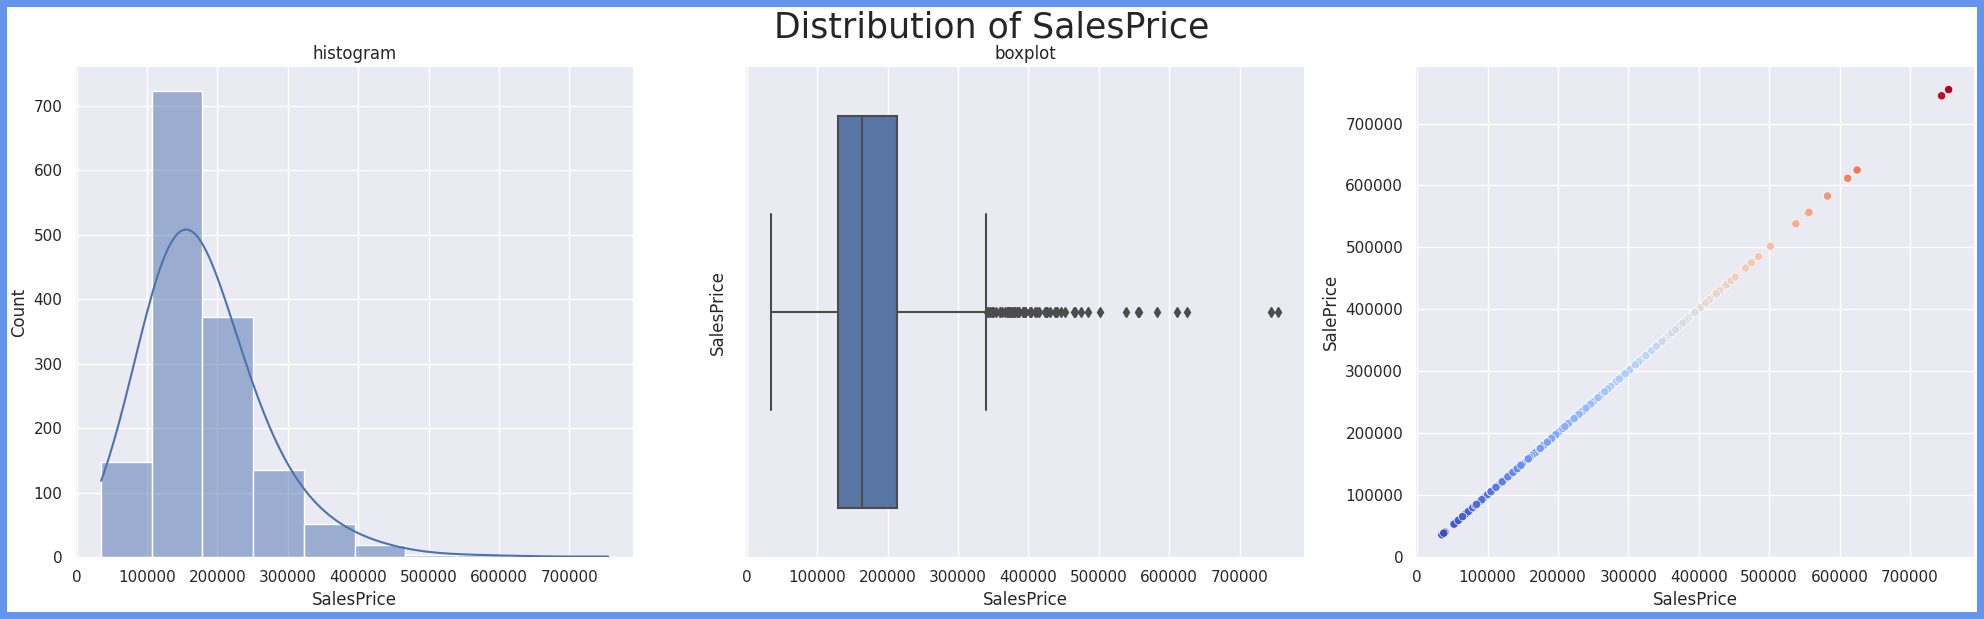

In [48]:
# Check distribution of target variable
# we have lot more but We mainly focus on features having higher correaltion
univariate_numerical_plot(X_y,'SalesPrice')

Corellation - x (train_data) & y (sales)

In [49]:
def make_mi_scores(X, y):
    X = X.copy()
    # All discrete features should now have integer dtypes
    # discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X.select_dtypes('number'), train_sale_price, random_state=0)
    mi_scores = pd.DataFrame(mi_scores.round(2), columns=["MI_Scores"], index=X.select_dtypes('number').columns)
    return mi_scores

In [50]:
mi_scores = make_mi_scores(train_data,train_sale_price)
linear_corr = pd.DataFrame(train_data.corrwith(train_sale_price).round(2), columns=['Lin_Correlation'])

corr_with_price = pd.concat([mi_scores, linear_corr], axis=1)
corr_with_price = corr_with_price.sort_values('MI_Scores',ascending=False)

corr_with_price

,MI_Scores,Lin_Correlation
SalePrice,5.58,1.00
Liv_Qual,0.73,0.82
OverallQual,0.57,0.79
Neighborhood,0.49,0.20
MedianNeighArea,0.49,0.66
BsmtArea_Qual,0.48,0.72
GrLivArea,0.48,0.71
GarageArea_Qual,0.39,0.69
YearBuilt,0.37,0.52
TotalBsmtSF,0.37,0.61


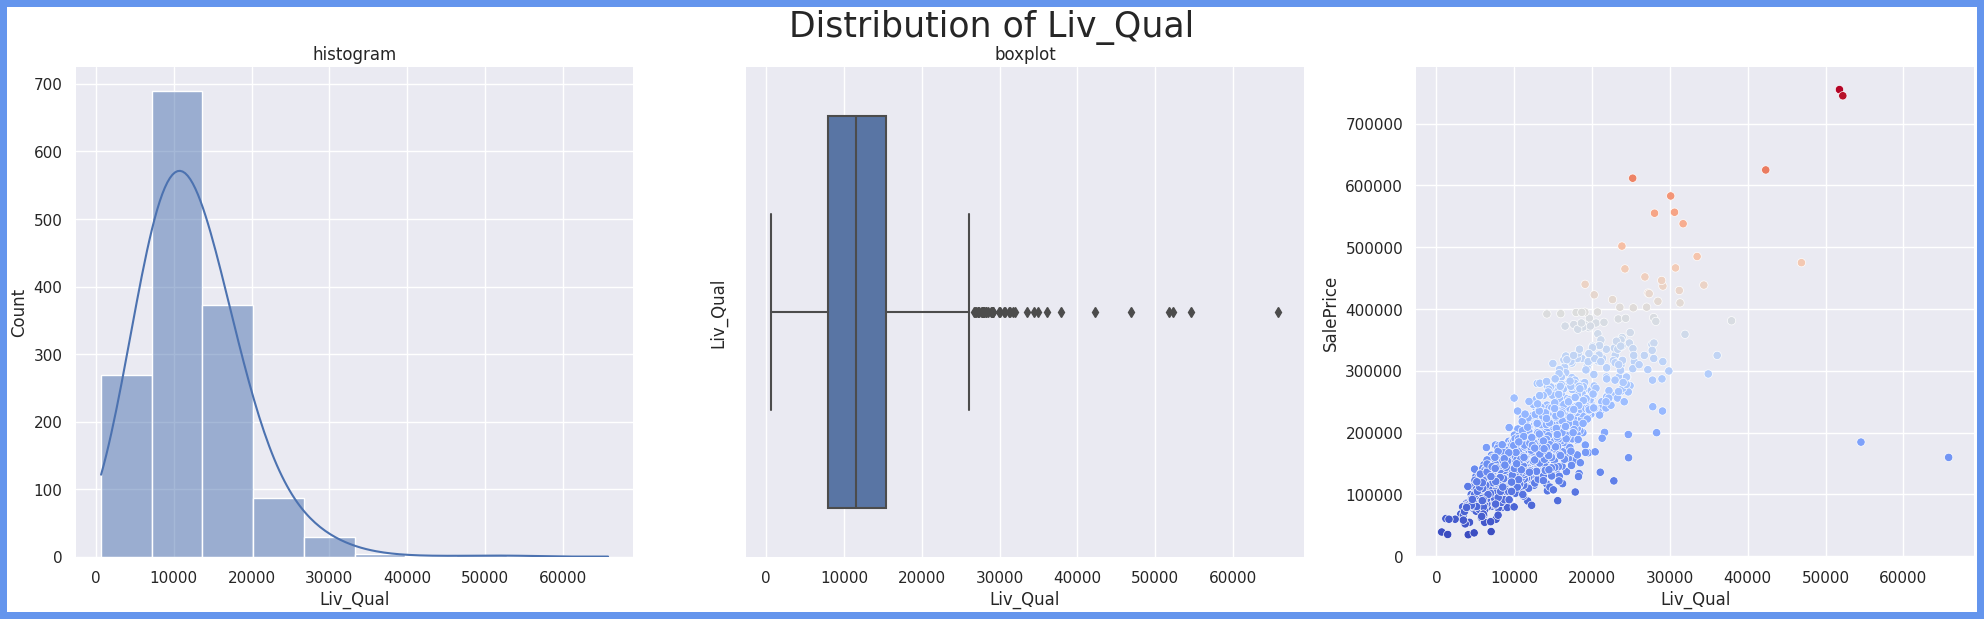

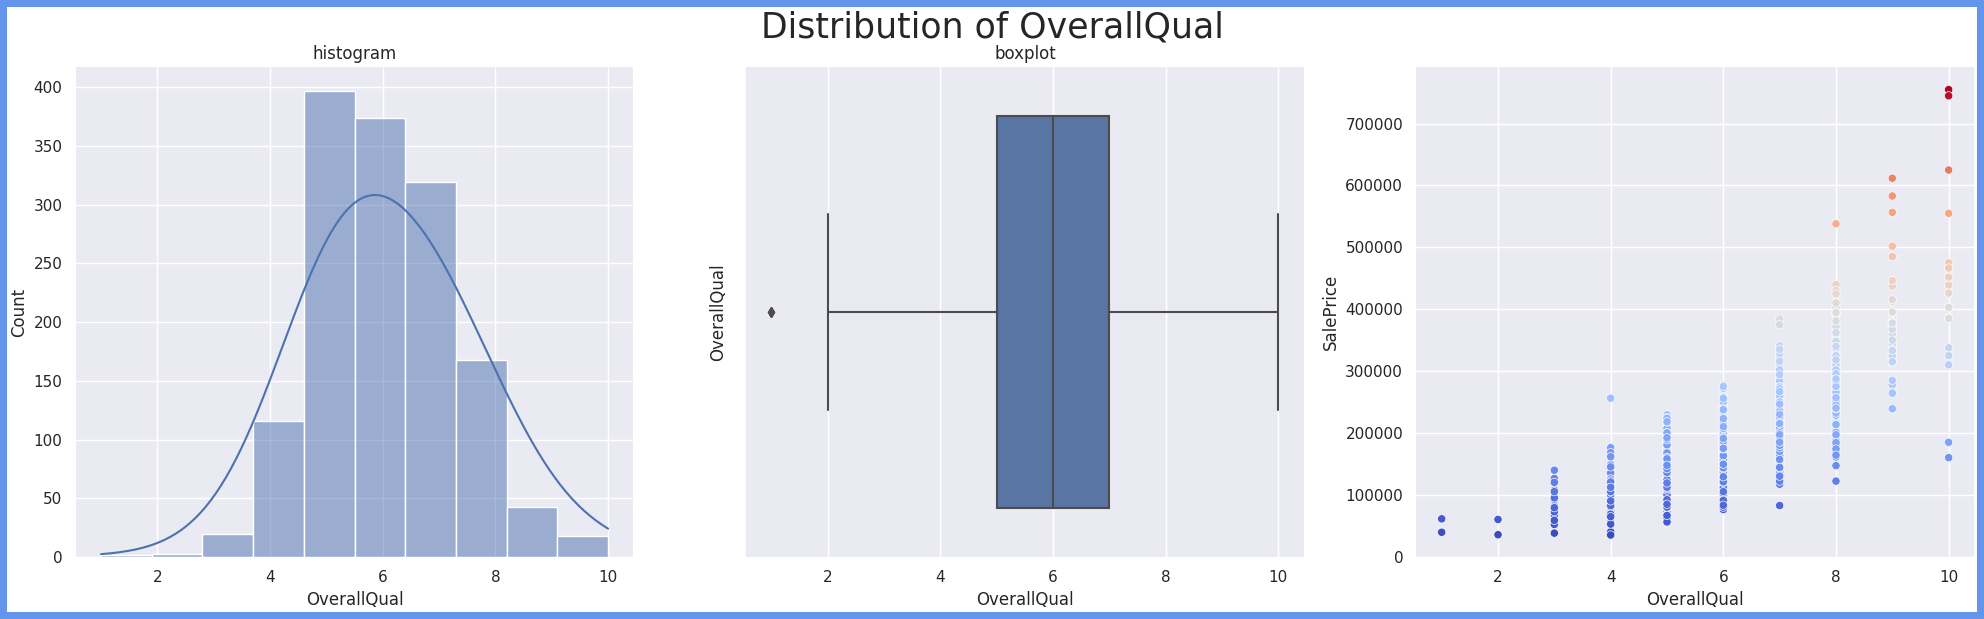

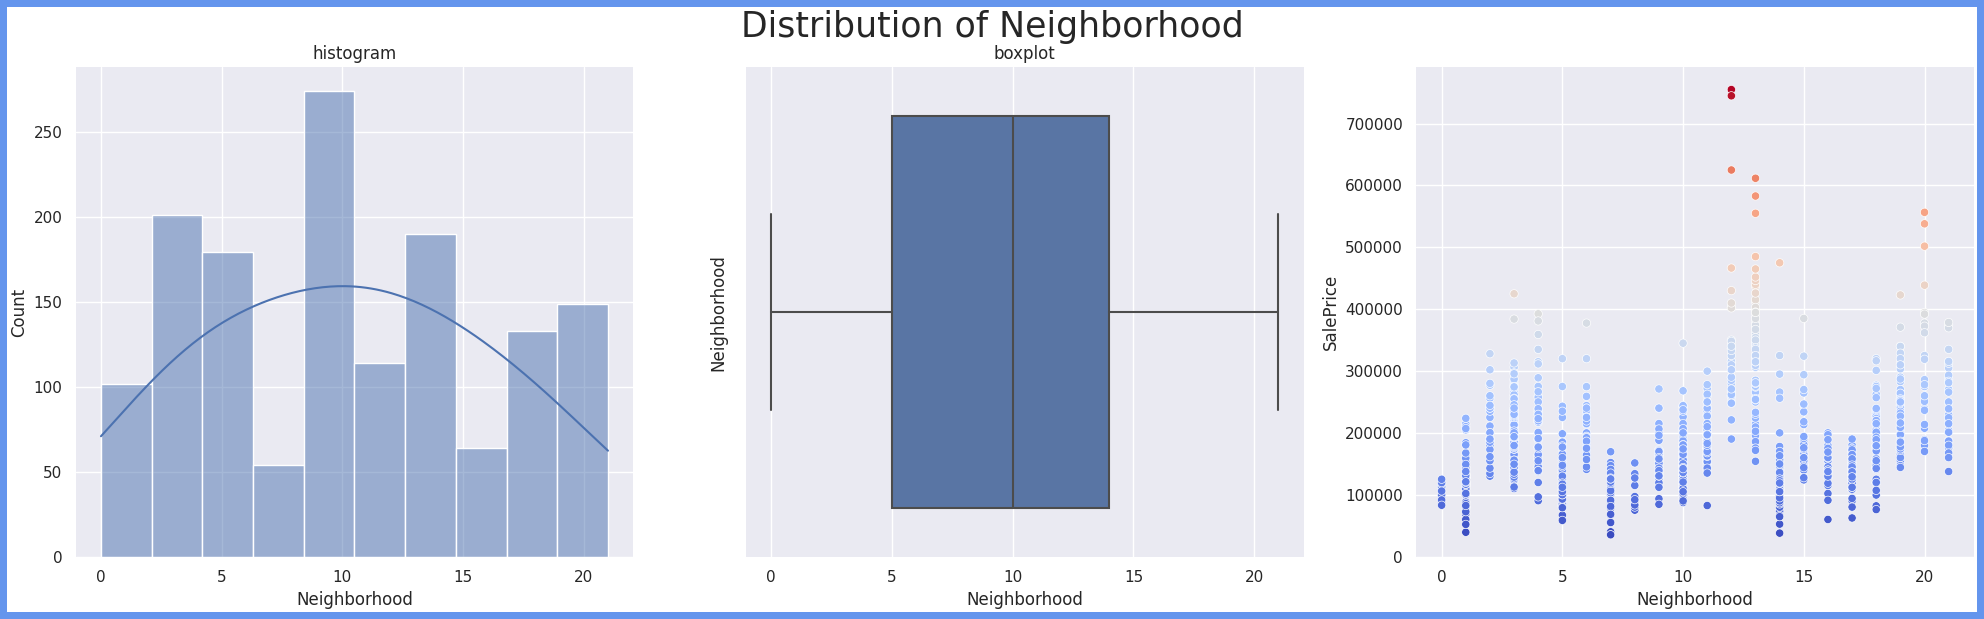

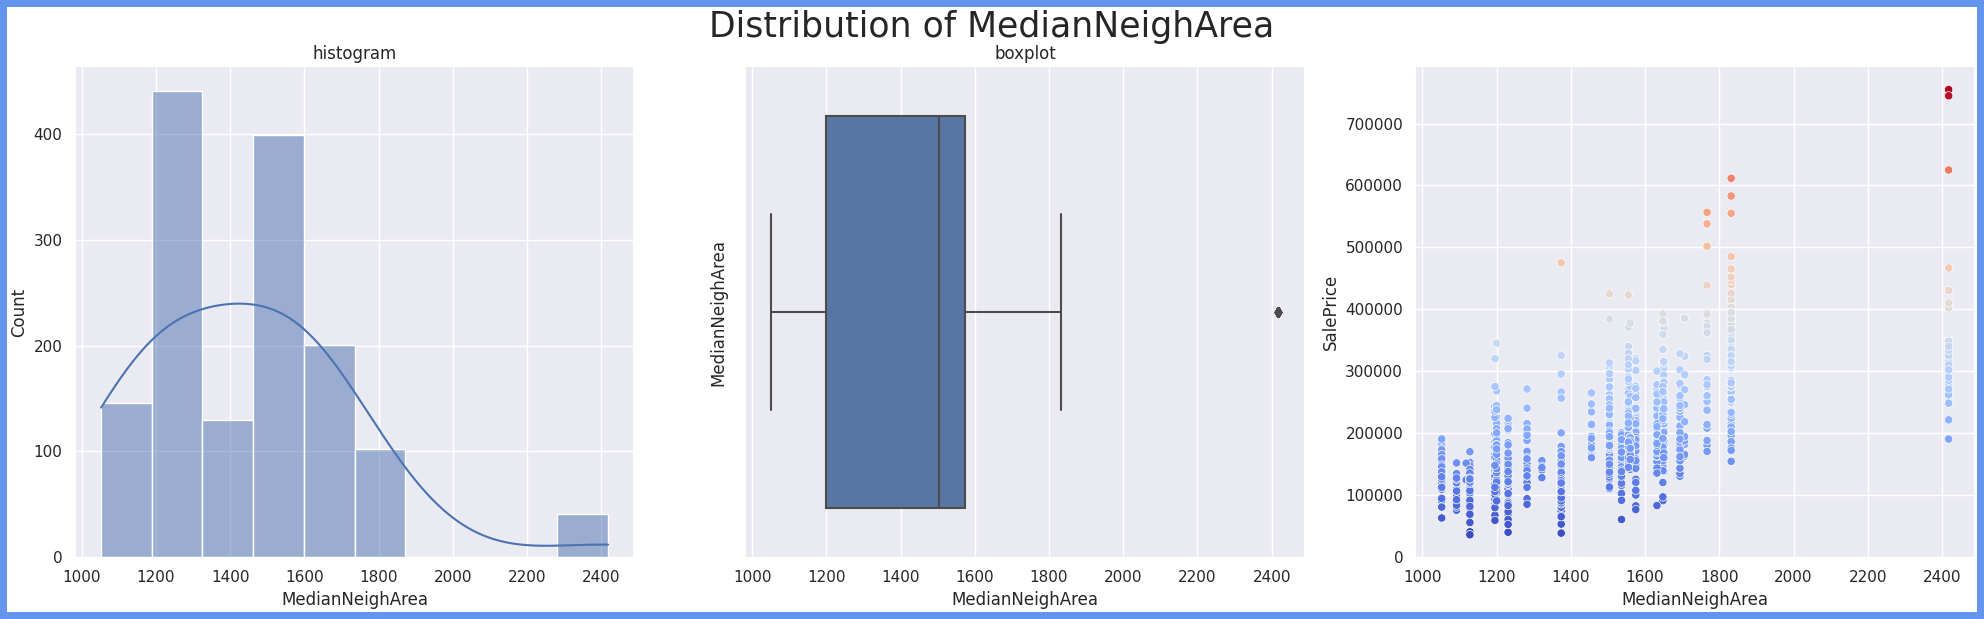

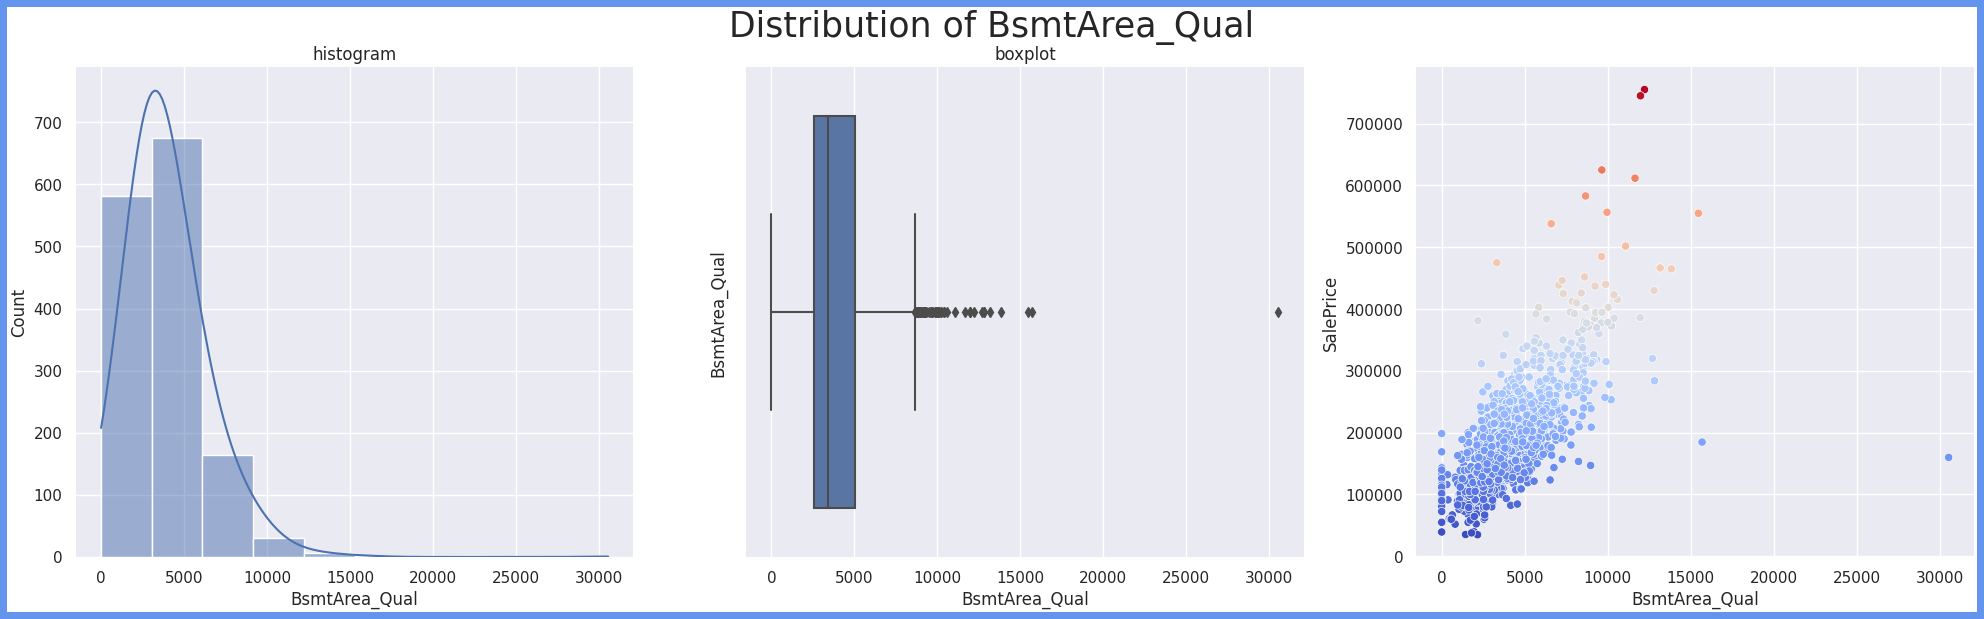

In [51]:
top_features = corr_with_price.index[1:6]
for feature in top_features:
    univariate_numerical_plot(train_data,feature)

In [52]:
before = test_data.shape[1]
test_data.dtypes.value_counts()

float64    94
dtype: int64

In [53]:
train_data = train_data.dropna(axis=0, subset=['SalePrice'])
train_data = train_data_f.drop(['SalePrice'], axis=1)
train_sale_price = train_data_f.SalePrice

# Numerical columns with large correlation with Sales Price
threshold = 0.01
selected_cols = [cname for cname in train_data.select_dtypes('number').columns
                  if corr_with_price.MI_Scores[cname] > threshold]

# Keep selected columns only
# selected_cols = numerical_cols
train_data = train_data[selected_cols]
test_data = test_data[selected_cols]
after = train_data.shape[1]

# Selected Features for Model Training or Fitting
print(f'Out of {before} features, {after} fetures are having MI_Scores more than {threshold}.')

Out of 94 features, 27 fetures are having MI_Scores more than 0.01.


In [54]:
# To see which columns were selected according to min correlation condition
info = pd.DataFrame(train_data.dtypes, columns=['Dtype'])
info['Unique'] = train_data.nunique().values
info['Null'] = train_data.isnull().sum().values
info.sort_values(['Dtype', 'Unique'])

,Dtype,Unique,Null
HalfBath,int64,3,0
FullBath,int64,4,0
Fireplaces,int64,4,0
GarageCars,int64,5,0
BedroomAbvGr,int64,8,0
OverallCond,int64,9,0
OverallQual,int64,10,0
TotRmsAbvGrd,int64,12,0
MSSubClass,int64,15,0
LowQualFinSF,int64,24,0


Model Creation

In [55]:
# Create object of class XGBRegressor
xgb = XGBRegressor(eval_metric='rmse')

In [56]:
param_grid = [
    {'subsample': [0.5], 'n_estimators': [1400], 
     'max_depth': [5], 'learning_rate': [0.02],
     'colsample_bytree': [0.4], 'colsample_bylevel': [0.5],
     'reg_alpha':[1], 'reg_lambda': [1], 'min_child_weight':[2]}
]
grid_search = GridSearchCV(xgb, param_grid, cv=3, verbose=1, scoring='neg_root_mean_squared_error')

In [57]:
grid_search.fit(train_data, np.log(train_sale_price));

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [58]:
# Top 5 hyper-parameter combinations
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results.sort_values('rank_test_score')[:6])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.643314,0.234061,0.014828,0.000501,0.5,0.4,0.02,5,2,1400,1,1,0.5,"{'colsample_bylevel': 0.5, 'colsample_bytree':...",-0.121685,-0.145233,-0.127557,-0.131492,0.010008,1


In [59]:
grid_search.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 0.4,
 'learning_rate': 0.02,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 1400,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.5}

In [60]:
print("RMSLE on training data:",round(-grid_search.score(train_data, np.log(train_sale_price)),4))
print("RMSLE on validation data:",round(-grid_search.best_score_,4))

RMSLE on training data: 0.0833
RMSLE on validation data: 0.1315


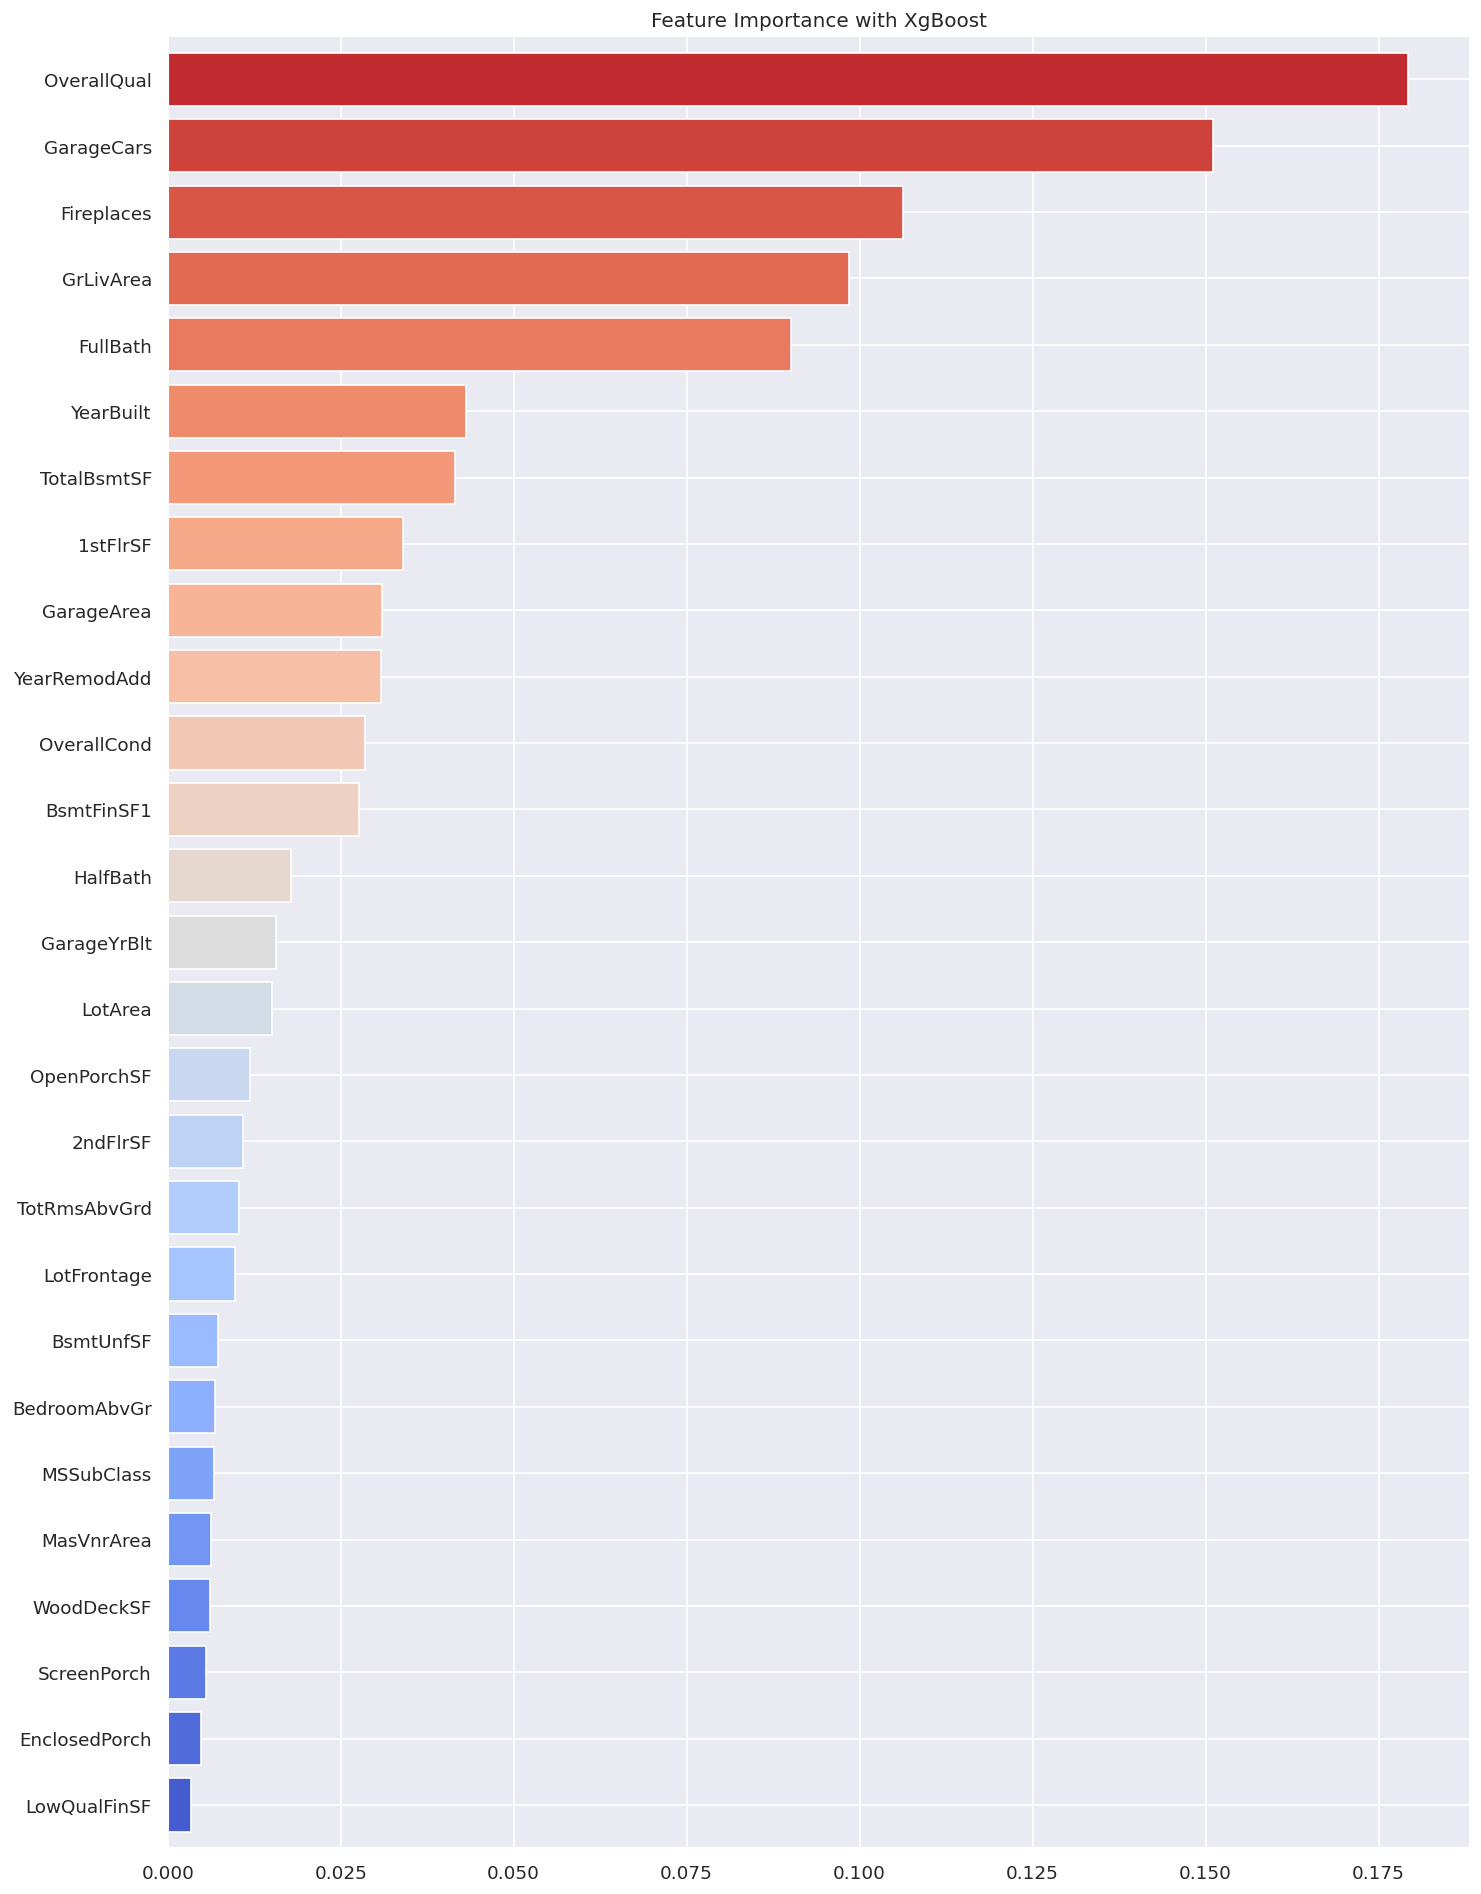

In [61]:
Feature_Imp = grid_search.best_estimator_.feature_importances_
Feature_Imp_sorted_series = pd.Series(Feature_Imp,train_data.columns).sort_values(ascending=True)

# Plot horizaontal bar plot
plt.figure(figsize=(14,20), dpi=120)
palette = sns.color_palette("coolwarm", len(train_data.columns)).as_hex()
ax = Feature_Imp_sorted_series.plot.barh(width=0.8 ,color=palette)
ax.set_title('Feature Importance with XgBoost')
plt.show()

Generate predictions

In [62]:
y_preds = np.exp(grid_search.predict(test_data))

In [63]:
# save to file
output = pd.DataFrame({'Id': test_data.index,
                       'SalePrice': y_preds.round()})
output.to_csv('submission.csv', index=False)


In [64]:
output.sample(5)

,Id,SalePrice
290,1751,220426.0
427,1888,300785.0
1100,2561,119273.0
1429,2890,74602.0
689,2150,216716.0
